# Regresion Lineal
## Reconocimiento de Patrones (1c 2021)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def func1(x):
    return 2 * x - 2 + (np.random.normal(0, 0.1, size=len(x)))    

Para este ejemplo se generaran datos siguiendo la siguiente funcion
    
   $$ g(x) = \sin (x \pi) + \epsilon $$
Con $\epsilon \sim \mathcal{N}(x | \mu, \sigma) $ y $\mu=0,\sigma=0.1$.

Sea $ \boldsymbol{x}_i = [x_1, \dots, x_D] $, siendo $D$ la dimension del problema (o datos), el modelo de regresion lineal seria

   $$ y(\boldsymbol{x}, \boldsymbol{w}) = w_0 + w_1 x_1 + \dots + w_D x_D = w_0 + \sum_{j=1}^D w_j  x_j $$

siendo $\boldsymbol{w}$ un vector de pesos inicializados aleatoriamente. Redefiniendo a $\boldsymbol{x}$ como
   
   $$ \boldsymbol{x} = [1, x_1, \dots, x_D] $$
  
Nos queda que
   
   $$ y(\boldsymbol{x}, \boldsymbol{w}) = \boldsymbol{w}^t \boldsymbol{x} $$

<!-- Los $x$ pertenecen a un rango entre 0 y 1, y $X$ es el vector que los contiene. En total son 100 puntos -->

In [3]:
X = np.linspace(0, 1, num=100)
y = func1(X)

X = X.reshape((100,1))
# Agregamos el 1 a cada vector de X
X1 = np.concatenate((np.ones(100).reshape((100,1)), X), axis=1)

$$ y_1 = w_0 * x_{10} + w_1 * x_{11} $$

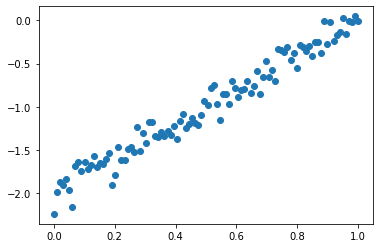

In [4]:
plt.scatter(X, y)
plt.show()

Tenemos definido el error cuadratico medio como

   $$ \sum_{i=1}^N (y_i - \boldsymbol{w}^t \boldsymbol{x}_i)^2 $$

Entonces la matrix $X1$ es aquella que posee los $N$ vectores extendidos $\boldsymbol{x}_1, \dots , \boldsymbol{x}_N$

In [5]:
# Calculamos la pseudo-inversa de X1 ( (X^T X)^-1 X^T )
X1_p =  np.linalg.pinv(X1)

# Calculamos w_hat
w_hat = X1_p.dot(y)

In [6]:
w_hat

array([-1.99397943,  1.99759813])

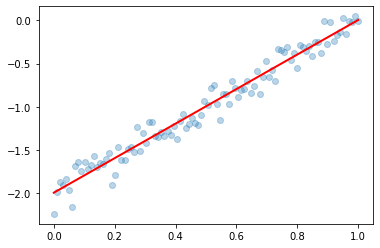

In [7]:
plt.scatter(X, y, alpha=0.3)
plt.plot(X, list(map(lambda x: w_hat.dot(x), X1)), color="red", linewidth=2)
plt.show()

In [8]:
def linear_regression(x, y):
    x = x.reshape((100,1))
    # Agregamos el 1 a cada vector de X
    x1 = np.concatenate((np.ones(100).reshape((100,1)), x), axis=1)
    # Calculamos la pseudo-inversa de X1 ( (X^T X)^-1 X^T )
    x1_p =  np.linalg.pinv(x1)
    # Calculamos w_hat
    return x1_p.dot(y)

---
Esto sirve para aquellos casos donde los datos son lineales, como la anterior que era $y=2x-2$, pero si subimos la complejidad a otra funcion, esto cambia

In [9]:
def func2(x):
    return np.sin(x * np.pi) + (np.random.normal(0, 0.1, size=len(x)))

In [10]:
X_2 = np.linspace(0, 1, num=100)
y_2 = func2(X_2)

In [11]:
wh_2 = linear_regression(X_2, y_2)
X_2_p = X_2.reshape((100,1))
X_2_p = np.concatenate((np.ones(100).reshape((100,1)), X_2_p), axis=1)

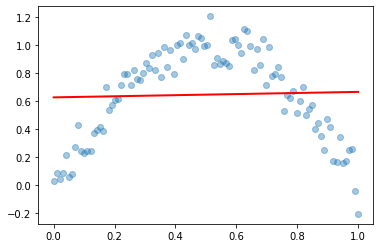

In [12]:
plt.scatter(X_2, y_2, alpha=0.4)
plt.plot(X_2, list(map(lambda x: wh_2.dot(x), X_2_p)), color="red", linewidth=2)
plt.show()

Vemos que una linea recta no es el mejor fit para el modelo

---
## Modelos con funciones base
Para combatir este problema, cambiaremos un poco la forma de nuestro modelo lineal. Generalizaremos los $x_{j}$ por $M-1$ funciones 

   $$ \{ \phi_j(\boldsymbol{x}) : \mathbb{R}^D \rightarrow \mathbb{R} \}_{j=1,\dots,M-1} $$
   
De forma tal que nos queda

   $$ y(\boldsymbol{x}, \boldsymbol{w}) = w_0 + w_1 \phi_1(\boldsymbol{x}) + \dots + w_{M-1} \phi_{M-1}(\boldsymbol{x}) = w_0 + \sum_{j=1}^{M-1} w_j \phi_j(\boldsymbol{x}) $$
   
Definiendo $\phi_0(\boldsymbol{x})$ = 1, podemos reformular y obtener

   $$ y(\boldsymbol{x}, \boldsymbol{w}) = w_0 \phi_0(\boldsymbol{x}) + w_1 \phi_1(\boldsymbol{x}) + \dots + w_{M-1} \phi_{M-1}(\boldsymbol{x}) = \sum_{j=0}^{M-1} w_j \phi_j(\boldsymbol{x}) = \boldsymbol{w}^T \boldsymbol{\phi}(\boldsymbol{x}) $$

Resolviendo para un estimador de Maxima Verosimilitud y con Cuadrados Minimos, obtenemos que 

   $$ \boldsymbol{w}_{MV} =  ( \boldsymbol{\Phi}^T \boldsymbol{\Phi} )^{-1} \boldsymbol{\Phi}^T \boldsymbol{y} $$
   
Donde $\boldsymbol{\Phi}$ es la matriz que contiene a los vectores extendidos $\boldsymbol{\phi}^T(\boldsymbol{x_j})$

$$ \boldsymbol{\Phi} = \boldsymbol{\Phi}(\boldsymbol{X}) = \begin{bmatrix} \boldsymbol{\phi}^T(\boldsymbol{x}_1) \\ \vdots \\ \boldsymbol{\phi}^T(\boldsymbol{x}_N) \end{bmatrix}$$

def func2(x):
    return np.sin(x * 1.5 * np.pi) + (np.random.normal(0, 0.1, size=len(x)))

De esta forma podemos usar distintas familias de funciones base, tales como Gaussianas, sigmoideas, etc

In [13]:
def bfunc1(x, mu, gamma=1):
    return np.exp(-gamma * np.linalg.norm(mu-x)**2)

In [37]:
X = np.linspace(0, 2, num=100)
y = func2(X)
M = 4

In [15]:
# Calculate design matrix Phi
Phi = np.ones((y.shape[0], M))
for m in range(M-1):
    mu = m/M
    Phi[:, m+1] = np.vectorize(bfunc1)(X, mu)

Phi_pinv = np.linalg.pinv(Phi)
# Calculamos w_hat
w_hat = Phi_pinv.dot(y)
alpha = sum((y - Phi @ w_hat)**2) / len(y)

In [16]:
print(w_hat, "\n", alpha)

[-3.44817964 -0.06761996  0.21713166  4.28403452] 
 0.011899674541357163


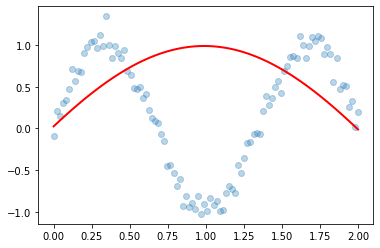

In [38]:
plt.scatter(X, y, alpha=0.3)
plt.plot(X, list(map(lambda x: w_hat.dot(x), Phi)), color="red", linewidth=2)
plt.show()

## Aprendizaje Secuencial

Como otra forma de aprendizaje se puede aplicar entrenamiento de forma iterativa, ya que puede ser de utilizad instancias intermedias del proceso de aprendizaje. Para esto podemos citar el Stochastic Gradient Descent, donde calculamos el error promedio para cada lote de datos. Luego este error se puede utilizar para actualizar el valor de $ \boldsymbol{w} $. Llamando $E=\sum_n E_n / N$ al error promedio cada $N$ muestras, la actualizacion de $ \boldsymbol{w} $

   $$ \boldsymbol{w}^{\tau+1} = \boldsymbol{w}^\tau - \eta \nabla E^\tau  $$

Donde $\tau$ es el epoch (numero de iteracion) y $\eta$ es un parametro llamado learning rate. Este parametro es clave para no causar un aprendizaje muy lento, ni uno que no pueda minimizar.

## Regularizacion

Para evitar el overfitting en nuestro modelo de Regresion Lineal, introducimos un termino de regularizacion en la formula de cuadrados minimos. Para eso necesitamos un parametro de regularizacion

Para simplificar y no repetir todo el tiempo el codigo, creo el objeto regresor lineal al que se le agregara el termino de regularizacion

In [18]:
class LinearRegression:
    def __init__(self, x, y, m=1, base_function=None, l=0):
        self.x = x
        self.y = y
        self.m = m
        self.base_function = base_function
        self.l = l
    
    def vectorize(self, x, y):
        # Calculate design matrix Phi
        phi = np.ones((y.shape[0], self.m))
        for m in range(self.m-1):
            mu = m/self.m
            phi[:, m+1] = (
                np.vectorize(self.base_function)(x, mu)
            )
        return phi
    
    def fit(self):
        self.phi = self.vectorize(self.x, self.y)
        self.w = np.linalg.inv(
            (self.phi.T @ self.phi) + self.l * np.identity(self.m)
        ) @ self.phi.T @ self.y
        self.alpha = sum((self.y - self.phi @ self.w)**2) / len(self.y)
        return self.w, self.alpha

In [63]:
lregressor = LinearRegression(X, y, m=20, base_function=bfunc1, l=1)

w, a = lregressor.fit()
phi = lregressor.phi

In [64]:
print(w, a)

[ 1.29096804  0.15766783  0.17977828  0.19100082  0.19066149  0.17851696
  0.15479787  0.12023534  0.07606798  0.02402792 -0.03369481 -0.09450942
 -0.15550149 -0.2135278  -0.26532553 -0.30763154 -0.33730709 -0.35146259
 -0.347577   -0.32360659] 0.2452825835888782


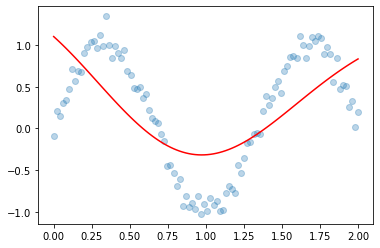

In [65]:
plt.scatter(X, y, alpha=0.3)
plt.plot(X, list(map(lambda x: w.dot(x), phi)), color='red')
plt.show()

---
---

In [66]:
def func2(x, sd=0.1):
    return np.sin(x * 1.5 * np.pi) + (np.random.normal(0, sd, size=len(x)))

In [67]:
X = np.linspace(0, 1.5, num=200)
y = func2(X, sd=0.25)

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [82]:
lregressor = LinearRegression(X_train, y_train, m=10, base_function=bfunc1, l=0.0001)
w, a = lregressor.fit()

In [83]:
print(w, a)

[  6.76985014 -64.94508145   8.15213322  42.25704037  41.42110509
  16.72468217 -15.4419902  -36.25381714 -27.96604591  22.61613899] 0.06264518437440703


In [84]:
y_v_test = lregressor.vectorize(X_test, y_test)

res = pd.DataFrame([X_test, list(map(lambda x: w.dot(x), y_v_test))]).T
res.columns = ['x','y']
res = res.sort_values(by='x')

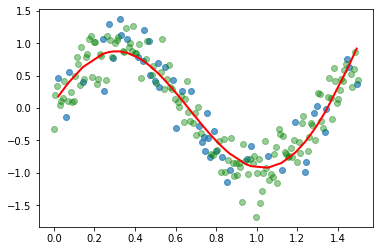

In [85]:
plt.scatter(X_test, y_test, alpha=0.7)
plt.scatter(X_train, y_train, alpha=0.4, color='green')
plt.plot(res['x'], res['y'], color='red', linewidth=2)
plt.show()

### Otras funciones base

In [86]:
def gaussian_alt(x, mu, gamma=1):
    return np.exp(-gamma * np.linalg.norm(mu-x)**2)

In [87]:
def sigmoid_alt(x, mu, sd=1):
    def sigma(a):
        return 1 / (1 - np.exp(-a))
    return sigma((x - mu) / sd)

In [88]:
X = np.linspace(0.001, 1.5, num=200)
y = func2(X, sd=0.25)

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [90]:
lr_sigmoid = LinearRegression(X_train, y_train, m=2, base_function=sigmoid_alt, l=0.0001)
w_s, a_s = lr_sigmoid.fit()

In [91]:
y_s_test = lr_sigmoid.vectorize(X_test, y_test)

In [92]:
res_s = pd.DataFrame([X_test, list(map(lambda x: w_s.dot(x), y_s_test))]).T
res_s.columns = ['x','y']
res_s = res_s.sort_values(by='x')

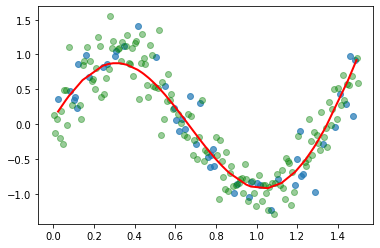

In [94]:
plt.scatter(X_test, y_test, alpha=0.7)
plt.scatter(X_train, y_train, alpha=0.4, color='green')
plt.plot(res['x'], res['y'], color='red', linewidth=2)
plt.show()